## Shapely tests

In [14]:
import numpy as np
from shapely.geometry import LineString
import subjects
import matplotlib.pyplot as plt

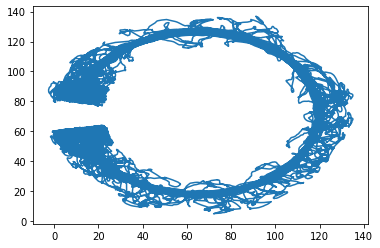

In [17]:
sessions = subjects.Sd().ratSday3
for sub,sess in enumerate(sessions):
    maze = sess.epochs.maze1
    maze_data = sess.tracks.data['maze1']
    plt.plot(maze_data.x,maze_data.y)
    line= LineString(zip(maze_data.x,maze_data.y))
    

In [30]:
a = list(line.coords)
len(a)

239880

## Coherence measure tests

In [13]:
import numpy as np
import subjects
import matplotlib.pyplot as plt
from scipy import signal
from plotUtil import Fig

In [16]:
%matplotlib widget
figure = Fig()
fig, gs = figure.draw(num=1,grid=(2,2))
sessions = subjects.Sd().ratSday3
for sub,sess in enumerate(sessions):
    maze = sess.epochs.maze1
    lfp1 = sess.recinfo.geteeg(chans=111,timeRange=maze)
    lfp2 = sess.recinfo.geteeg(chans=63,timeRange=maze)
    f,sxx1 = signal.spectrogram(lfp1,fs= eegsrate,nperseg=5*eegsrate,n)

    f,cxy = signal.coherence(lfp1,lfp2,nperseg=10*1250,noverlap=2*1250,fs=1250)
    ax = plt.subplot(gs[0])
    ax.loglog(f,cxy)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …